In [1]:
import os
import json
import sys

In [2]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
a = json.load(open('../data/preprocessing/herb_corpus/herb_syms_total.json'))

In [2]:
save = {}
track = 0
count = 0
#outdir = '../data/abstract_full_1/'
outdir = 'H:/data/full_text_PMC/'
for each in os.listdir('H:/data/full_PMC/') :
    data = json.load(open('H:/data/full_PMC/%s'%each))
    for ID in data :
        save[ID] = data[ID]
        count+=1
        if count > 10000 :
            if track < 10:
                outfile = open(os.path.join(outdir,os.path.basename('text_0%s.json'%track)),'w')
            else:
                outfile = open(os.path.join(outdir,os.path.basename('text_%s.json'%track)),'w')
            outfile.write(json.dumps(save))
            outfile.close()
            track+=1
            count = 0
            save = {}
            print(track)
outfile = open(os.path.join(outdir,os.path.basename('abstract_%s.json'%track)),'w')
outfile.write(json.dumps(save))
outfile.close()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165


In [22]:
'AAas\ndasd'.replace('\n',' ')

'AAas dasd'

In [3]:
X = np.load('../data/PCA/sen_vector_PCA.npy')

In [34]:
for n in range(2,15):
    kmeans = KMeans(n_clusters=n, max_iter=10000).fit(X)
    pred_label = kmeans.predict(X)
    count = {}
    for each in pred_label :
        if each in count :
            count[each]+=1
        else:
            count[each] = 1
    print([count[i] for i in list(sorted(count)) ])

[8702, 23215]
[4292, 6386, 21239]
[16224, 9406, 1808, 4479]
[3404, 15377, 8819, 2593, 1724]
[1327, 14962, 6010, 2513, 3053, 4052]
[3562, 12958, 1186, 2413, 5317, 5099, 1382]
[1402, 5042, 1132, 3406, 5003, 905, 2344, 12683]
[11714, 3343, 4260, 1105, 1287, 4725, 3513, 1082, 888]
[1906, 9984, 1016, 3937, 3992, 3373, 1052, 4851, 928, 878]
[9367, 1557, 942, 3254, 1052, 626, 2902, 3871, 2104, 5428, 814]
[3715, 9538, 2730, 1010, 1445, 1555, 2586, 866, 403, 833, 3957, 3279]
[2229, 858, 514, 8992, 2531, 3269, 1638, 826, 3932, 1434, 975, 3844, 875]
[821, 8652, 2422, 1059, 3623, 1370, 2261, 4124, 875, 1301, 3241, 807, 974, 387]


In [51]:
len(performance)

49

In [64]:
b = {}
for each in a :
    b[int(each)] = a[each]

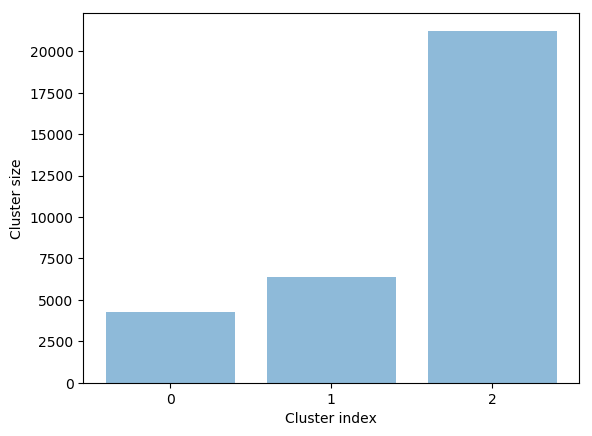

In [6]:
performance = []
#for each in sorted(b) :
    #performance.append(b[each])
performance = [4292, 6386, 21239]
objects = list(range(len(performance)))
y_pos = np.arange(len(objects))
plt.clf()
plt.bar(y_pos, performance, align='center', alpha=0.5)
#plt.xticks([0,8,18,28,38,48],[2,10,20,30,40,50])
plt.xticks(y_pos, objects)
plt.ylabel('Cluster size')
plt.xlabel('Cluster index')
outdir = '../data/'
plt.savefig('%s/cluster_size_k=2.png'%(outdir))
 
plt.show()

In [14]:
top = {}
for each in a :
    top[a[each]] = each

for each in sorted(top)[::-1][:10] :
    print(top[each])
    print(each)


2
0.2669196525721367
3
0.22823416911548533
5
0.1192528170119993
4
0.11772441046119776
6
0.11367708517948984
7
0.11298561648727914
8
0.09433976237338451
9
0.08254322914164078
10
0.06146870028503213
11
0.0592410689650386


In [10]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn

X_scaled = np.load('../data/PCA/sen_vector_PCA.npy')
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( X_scaled )
    cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

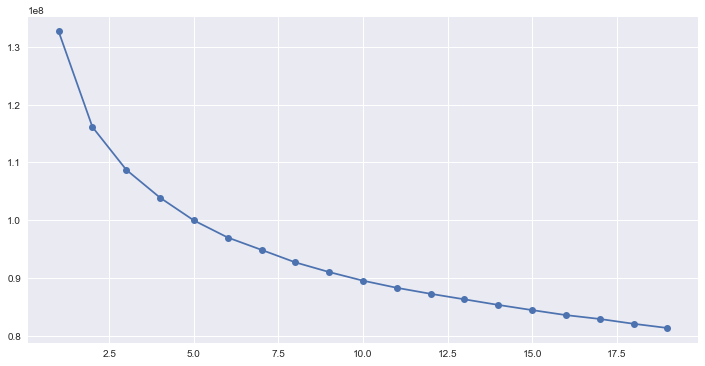

In [11]:
plt.show()